# Linear Regression

In [2]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [4]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


### Visualize two of the inputs

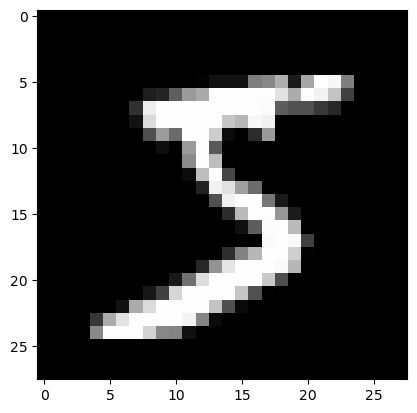

In [5]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

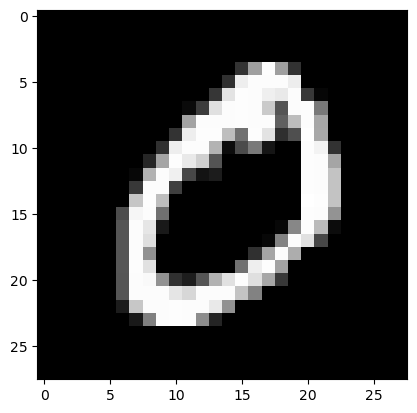

In [6]:
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [7]:
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [10]:
import torch

# build model for regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [12]:
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)
 
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

In [13]:
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.2039220333099365. Accuracy: 64.76
Epoch: 1. Loss: 2.0953056812286377. Accuracy: 75.43
Epoch: 2. Loss: 2.037867307662964. Accuracy: 77.49
Epoch: 3. Loss: 1.9873647689819336. Accuracy: 79.12
Epoch: 4. Loss: 1.9370774030685425. Accuracy: 80.19
Epoch: 5. Loss: 1.9338129758834839. Accuracy: 80.84
Epoch: 6. Loss: 1.96433687210083. Accuracy: 81.42
Epoch: 7. Loss: 1.8908675909042358. Accuracy: 81.98
Epoch: 8. Loss: 1.8490996360778809. Accuracy: 82.29
Epoch: 9. Loss: 1.882480502128601. Accuracy: 82.6
Epoch: 10. Loss: 1.8102365732192993. Accuracy: 82.9
Epoch: 11. Loss: 1.7822109460830688. Accuracy: 83.06
Epoch: 12. Loss: 1.8571809530258179. Accuracy: 83.29
Epoch: 13. Loss: 1.837429165840149. Accuracy: 83.46
Epoch: 14. Loss: 1.7860639095306396. Accuracy: 83.68
Epoch: 15. Loss: 1.7979962825775146. Accuracy: 83.87
Epoch: 16. Loss: 1.8268929719924927. Accuracy: 83.98
Epoch: 17. Loss: 1.7982975244522095. Accuracy: 84.14
Epoch: 18. Loss: 1.764667272567749. Accuracy: 84.26
Epoch: 19. 

In [18]:
nn_loss = Loss
nn_acc = acc

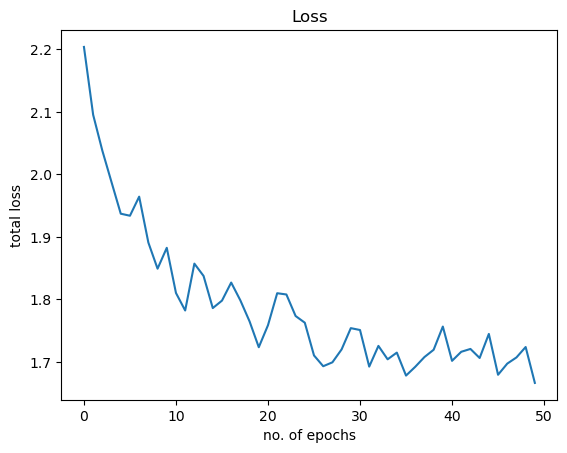

In [19]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

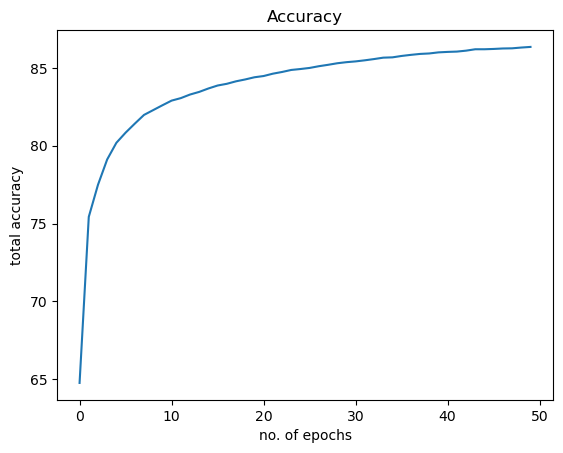

In [20]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

# SVM

In [21]:
import torch
import numpy as np
import pandas as pd
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [22]:
# loading training data
train_dataset = datasets.MNIST(root='./data',
							   train=True,
							   transform=transforms.ToTensor(),
							   download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data',
							  train=False,
							  transform=transforms.ToTensor())


In [23]:
# load train and test data samples into dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
test_loader = DataLoader(dataset=test_dataset, shuffle=False)

X_train = []
y_train = []

for images, labels in train_loader:
	X_train.append(images.numpy())
	y_train.append(labels.numpy())

X_train = np.concatenate(X_train, axis=0).reshape(-1, 28*28)
y_train = np.concatenate(y_train, axis=0)

In [24]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# since there is no concept of epocs for SVM or RF, we compute other metrics
test_loader = DataLoader(dataset=test_dataset, shuffle=False)

X_test = []
y_test = []

for images, labels in test_loader:
	X_test.append(images.numpy())
	y_test.append(labels.numpy())

X_test = np.concatenate(X_test, axis=0).reshape(-1, 28*28)
y_test = np.concatenate(y_test, axis=0)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9404

In [34]:
precision_score(y_test, y_pred, average="weighted")

0.9404744228503641

In [35]:
recall_score(y_test, y_pred, average="weighted")

0.9404

In [36]:
f1_score(y_test, y_pred, average="weighted")

0.9402807661109526

In [32]:
confusion_matrix(y_test, y_pred)

array([[ 957,    0,    4,    1,    1,    6,    9,    1,    0,    1],
       [   0, 1122,    3,    2,    0,    1,    2,    1,    4,    0],
       [   8,    6,  967,   11,    3,    3,    7,    8,   17,    2],
       [   4,    3,   16,  947,    1,   16,    0,    9,   12,    2],
       [   1,    1,   10,    1,  942,    2,    4,    2,    3,   16],
       [  10,    4,    3,   36,    6,  803,   13,    1,   14,    2],
       [   9,    2,   13,    1,    5,   16,  910,    1,    1,    0],
       [   1,    8,   21,   10,    8,    1,    0,  957,    3,   19],
       [   8,    4,    6,   25,    7,   26,    6,    7,  877,    8],
       [   7,    7,    2,   11,   33,    4,    0,   18,    5,  922]])

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",9
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [39]:
# since there is no concept of epochs for RF, we use different metrics
pred=rf.predict(X_test)

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.94      0.92      0.93      1010
           4       0.94      0.92      0.93       982
           5       0.96      0.92      0.94       892
           6       0.95      0.96      0.96       958
           7       0.95      0.92      0.93      1028
           8       0.93      0.92      0.92       974
           9       0.87      0.93      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [42]:
confusion_matrix(y_test, pred)

array([[ 965,    1,    2,    1,    0,    1,    5,    1,    3,    1],
       [   0, 1120,    3,    2,    0,    2,    3,    1,    4,    0],
       [   7,    2,  963,   12,    9,    1,    7,   15,   12,    4],
       [   3,    0,   19,  932,    2,   16,    0,   14,   15,    9],
       [   1,    1,    1,    0,  904,    1,   11,    2,    5,   56],
       [   8,    6,    0,   22,    5,  819,   11,    3,    8,   10],
       [   9,    4,    1,    0,   11,    7,  920,    0,    6,    0],
       [   2,   11,   26,    3,    4,    0,    0,  941,    4,   37],
       [   4,    3,    7,    9,    7,    7,   10,    5,  898,   24],
       [   9,    6,    0,   15,   19,    3,    1,    8,   14,  934]])